In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from NeuralNetwork import NeuralNetwork

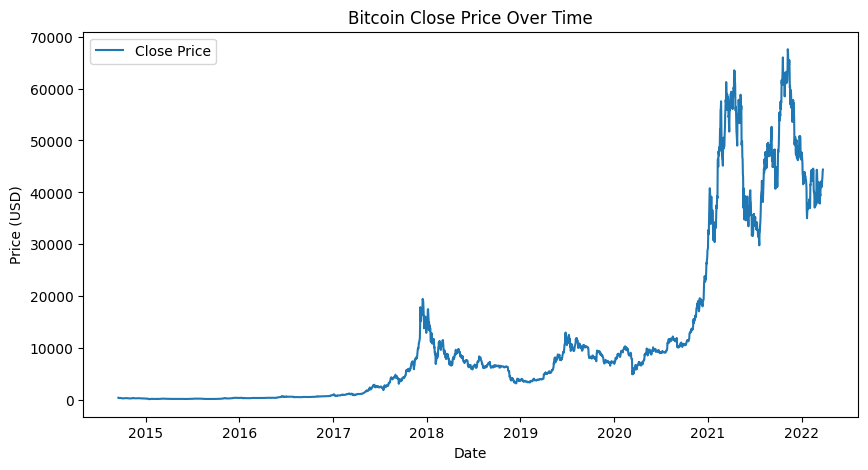

In [2]:
data = pd.read_excel("BTC-USD.xlsx")

#To convert the Date data to a datetime format
data['Date'] = pd.to_datetime(data['Date'])

#To use the date as an index
data.set_index('Date', inplace=True)

#Displaying the closing price over time
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price')
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [3]:
#Calculate moving average of the price for the past 30 days
data['Moving Average'] = data['Close'].rolling(window=30).mean()
# Calculate price volatility
data['Volatility'] = data['Close'].rolling(window=30).std()
# Calculate price momentum
data['Momentum'] = data['Close'] - data['Close'].shift(7)
data.dropna(inplace=True)
data.head()


,Open,High,Low,Close,Adj Close,Volume,Moving Average,Volatility,Momentum
Date,,,,,,,,,
2014-10-16,394.518005,398.807007,373.070007,382.556000,382.556000,26990000,384.112801,32.045785,17.529999
2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700,381.660267,28.910903,22.195984
2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,11416800,380.560333,27.834889,29.142975
2014-10-19,391.253998,393.938995,386.457001,389.545990,389.545990,5914570,380.385333,27.758701,10.996979
2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000,379.516700,27.238360,-7.569000


In [9]:
#Use all features to predict the future close value
features = ['Open', 'High', 'Low', 'Volume', 'Moving Average', 'Volatility', 'Momentum']
X = data[features]
y = data['Close']

# Initialize the neural network
model = NeuralNetwork(input_size=len(features))

#Normalize data
X_scaled, y_scaled = model.prepare_data(X,y)

# Split the dataset and create data loaders
train_size = int(0.8 * len(data))
val_size = int(0.1 * len(data))

train_loader, val_loader, test_loader = model.create_data_loaders(
    X_scaled, y_scaled, train_size, val_size, batch_size=32
)

# Train the model
train_losses, val_losses = model.train(train_loader, val_loader, epochs=100)


Epoch [10/100], Train Loss: 0.0022, Val Loss: 0.0009
Epoch [20/100], Train Loss: 0.0015, Val Loss: 0.0009
Epoch [30/100], Train Loss: 0.0015, Val Loss: 0.0004
Epoch [40/100], Train Loss: 0.0011, Val Loss: 0.0005
Epoch [50/100], Train Loss: 0.0010, Val Loss: 0.0004
Epoch [60/100], Train Loss: 0.0007, Val Loss: 0.0022
Epoch [70/100], Train Loss: 0.0005, Val Loss: 0.0012
Epoch [80/100], Train Loss: 0.0005, Val Loss: 0.0027
Epoch [90/100], Train Loss: 0.0005, Val Loss: 0.0021
Epoch [100/100], Train Loss: 0.0003, Val Loss: 0.0018


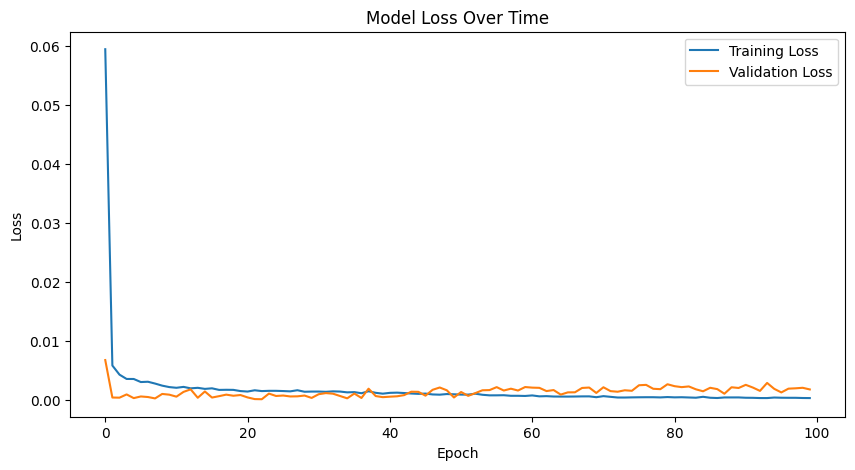

In [10]:
#Plot showing loss in training and validation sets 
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

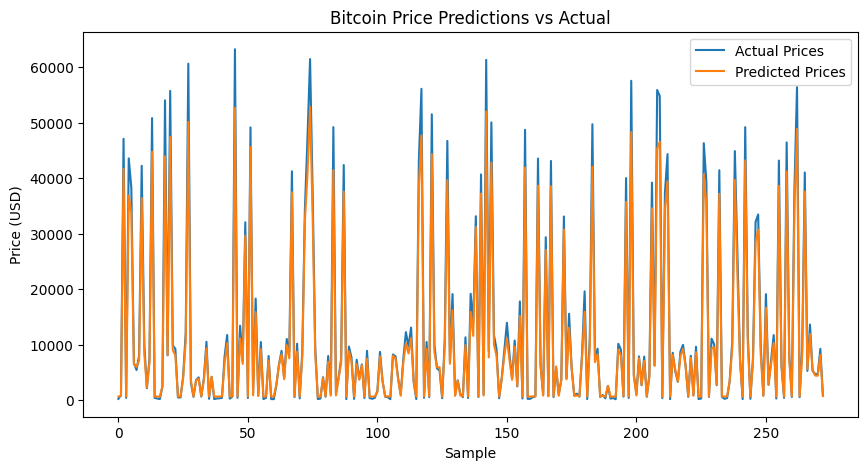

Test Root Mean Squared Error: $2785.45


In [11]:
#Plotting actual values vs predictions
predictions, actuals, rmse = model.evaluate(test_loader)
plt.figure(figsize=(10, 5))
plt.plot(actuals, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Bitcoin Price Predictions vs Actual')
plt.xlabel('Sample')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

print(f'Test Root Mean Squared Error: ${rmse:.2f}')